In [12]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# i have to make a table of absolute, relative(%) and cumulative frequencies for columns survived, pclass and age
total_survived = df['survived'].value_counts()
total_pclass = df['pclass'].value_counts()
total_age = df['age'].value_counts()

relative_survived = total_survived / total_survived.sum() * 100
relative_pclass = total_pclass / total_pclass.sum() * 100
relative_age = total_age / total_age.sum() * 100

cumulative_survived = total_survived.cumsum()
cumulative_pclass = total_pclass.cumsum()   
cumulative_age = total_age.cumsum()



In [10]:
def frequency_table(series, column_name):
    absolute = series.value_counts().sort_index()
    relative = (absolute / absolute.sum()) * 100
    cumulative = absolute.cumsum()

    freq_df = pd.DataFrame({
        f'{column_name}_value': absolute.index,
        'Absolute Frequency': absolute.values,
        'Relative Frequency (%)': relative.values,
        'Cumulative Frequency': cumulative.values
    })

    return freq_df

survived_freq = frequency_table(df['survived'], 'Survived')
pclass_freq = frequency_table(df['pclass'], 'Pclass')
age_freq = frequency_table(df['age'], 'Age')

print("Survived Frequency Table:\n", survived_freq)
print("\nPclass Frequency Table:\n", pclass_freq)
print("\nAge Frequency Table:\n", age_freq)


Survived Frequency Table:
    Survived_value  Absolute Frequency  Relative Frequency (%)  \
0               0                 549               61.616162   
1               1                 342               38.383838   

   Cumulative Frequency  
0                   549  
1                   891  

Pclass Frequency Table:
    Pclass_value  Absolute Frequency  Relative Frequency (%)  \
0             1                 216               24.242424   
1             2                 184               20.650954   
2             3                 491               55.106622   

   Cumulative Frequency  
0                   216  
1                   400  
2                   891  

Age Frequency Table:
     Age_value  Absolute Frequency  Relative Frequency (%)  \
0        0.42                   1                0.140056   
1        0.67                   1                0.140056   
2        0.75                   2                0.280112   
3        0.83                   2                

In [24]:
male_survived = sum(df[df['sex'] == 'male']['survived'] == 1)
female_survived = sum(df[df['sex'] == 'female']['survived'] == 1)

total = len(df)
male_unsurvived = total - male_survived
female_unsurvived = total - female_survived

total_survived = male_survived + female_survived
total_unsurvived = male_unsurvived + female_unsurvived


In [25]:
data = {
    '':['Survived == 0', 'Survived == 1', 'Total'],
    'Male': [male_survived, male_unsurvived, male_survived + male_unsurvived],
    'Female': [female_survived, female_unsurvived, female_survived + female_unsurvived],
    'Total': [total_survived, total_unsurvived, total_survived + total_unsurvived]
}

survival_table = pd.DataFrame(data)
print(survival_table)

                  Male  Female  Total
0  Survived == 0   109     233    342
1  Survived == 1   782     658   1440
2          Total   891     891   1782


In [34]:
# Joint Probability
# P(Sex == Female, Survived == 1)
# intersection / total
joint_prob = sum(df[df['sex'] == 'female']['survived'] == 1) / total
print(f"Joint Probability is {joint_prob:.4f}")

Joint Probability is 0.2615


In [30]:
# Marginal probabilities
# P(Sex == Female)
marginal_prob1 = df[df['sex'] == 'female'].shape[0] / total

# P(Survived == 1)
marginal_prob2 = df[df['survived'] == 1].shape[0] / total

print(f"Marginal Probability of sex = female: {marginal_prob1}%")
print(f"Marginal Probability of survived = 1: {marginal_prob2}%")

Marginal Probability of sex = female: 0.35241301907968575%
Marginal Probability of survived = 1: 0.3838383838383838%


In [ ]:
# Conditional Probability
# P(Sex = Female| Survived = 1)
# ans = P(Sex = Female & Survived = 1) / P(survived = 1)
sex_female_survived = female_survived / df[df['survived'] == 1].shape[0]

# P(A | B) = P(B | A) * P(A) / P(B)
undhu = sex_female_survived * df[df['survived'] == 1].shape[0] / df[df['sex'] == 'female'].shape[0]

print(f"Conditional Probabilities are : {undhu}% and {sex_female_survived}%")

Conditional Probabilities are : 0.7420382165605096% and 0.6812865497076024%


In [37]:
# i saw crosstab after implementing the above code
crosstab = pd.crosstab(df['sex'], df['survived'])
print(crosstab)

survived    0    1
sex               
female     81  233
male      468  109


In [39]:
# check if there are null values in the age and fare columns
null_age = df['age'].isnull().sum()
null_fare = df['fare'].isnull().sum()
print(f"Null values in 'age': {null_age}")
print(f"Null values in 'fare': {null_fare}")

Null values in 'age': 177
Null values in 'fare': 0


Pearson correlation between age and fare:
           age      fare
age   1.000000  0.096688
fare  0.096688  1.000000


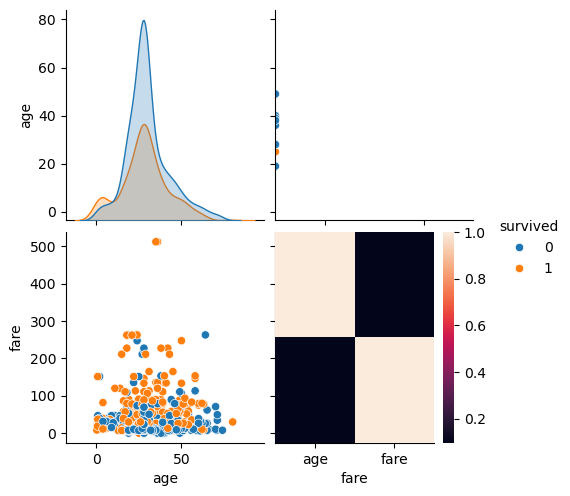

In [45]:
# so i need to fill the null values in age using median
df['age'] = df['age'].fillna(df['age'].median())  

# Finding pearson correlation between age and fare
pearson = df[['age', 'fare']].corr(method='pearson')
print(f"Pearson correlation between age and fare:\n{pearson}")

sns.pairplot(df, hue='survived', vars=['age', 'fare'])
sns.heatmap(df[['age', 'fare']].corr())
import matplotlib.pyplot as plt
plt.scatter(df['age'], df['fare'], c=df['survived'])
plt.show()


So the interpretation is that age and fare are strongly correlated and directly proportional